In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
path = 'KPMG_VI_New_raw_data.xlsx'

In [3]:
# customer demographics table
demog = pd.read_excel(path, sheet_name='CustomerDemographic')
demog.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [4]:
# customer addresses table
addr = pd.read_excel(path, sheet_name='CustomerAddress')
addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,0 Holy Cross Court,4211,QLD,Australia,9
3,4,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,9 Oakridge Court,3216,VIC,Australia,9


In [5]:
# transactions table
trans = pd.read_excel(path, sheet_name='Transactions')
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [6]:
# create a copy of these tables for modeling
demog_cop = demog.copy()
addr_cop = addr.copy()
trans_cop = trans.copy()

### Data Preparation

In [7]:
def create_customer_table(demographics, address):
    """ Concatenates demographics table and address table using only the 2nd to 6th columns of address"""
    customers_table = pd.concat([demographics, address.iloc[:, 1:6]], axis=1)
    
    return customers_table

In [8]:
# concatenate demographic and address together
customers = pd.concat([demog_cop, addr_cop.iloc[:, 1:6]], axis=1)
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,9 Oakridge Court,3216,VIC,Australia,9


In [9]:
def approved_transactions(transactions):
    """ Keeps only approved transactions from the transactions table  and returs
    data with customer_id, list_price, standard_cost and order_status variables. """
    
    to_keep = ['customer_id', 'list_price', 'standard_cost', 'order_status']
    transactions_approved = transactions.loc[trans_cop['order_status']=='Approved', to_keep]
    
    return transactions_approved

In [10]:
# keep approved transactions
trans_cop_approved = approved_transactions(trans_cop)
trans_cop_approved.head()

,customer_id,list_price,standard_cost,order_status
0,1,235.63,125.07,Approved
1,1,1577.53,826.51,Approved
2,1,1720.70,1531.42,Approved
3,1,360.40,270.30,Approved
4,1,71.49,53.62,Approved


In [11]:
def create_profit_variable(transactions):
    """ Creates a profit variable by subtracting standard_cost from list_price. """
    transactions['profit'] = transactions['list_price'] - transactions['standard_cost']
    
    return transactions

In [12]:
# create profit variable
trans_cop_approved = create_profit_variable(trans_cop_approved)
trans_cop_approved.head()

,customer_id,list_price,standard_cost,order_status,profit
0,1,235.63,125.07,Approved,110.56
1,1,1577.53,826.51,Approved,751.02
2,1,1720.70,1531.42,Approved,189.28
3,1,360.40,270.30,Approved,90.10
4,1,71.49,53.62,Approved,17.87


In [13]:
def customers_with_profit(customers_table, transactions_table):
    """ Adds up profit of each customer_id from the transaction table to the customers table"""
    profit = []
    for ID in customers_table['customer_id']:
        prof = transactions_table.loc[transactions_table['customer_id'] == ID, 'profit'].sum()
        profit.append(prof)
    
    customers_table['profit'] = profit
    
    return customers_table

In [14]:
# to add up profit of each customer_id from the transaction table to the customers table
customers = customers_with_profit(customers, trans_cop_approved)
customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,3018.09
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,2226.26
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0 Holy Cross Court,4211,QLD,Australia,9,3362.81
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,17979 Del Mar Point,2448,New South Wales,Australia,4,220.57
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,9 Oakridge Court,3216,VIC,Australia,9,2394.94


In [15]:
# customers table with profit variable
#customers.to_csv('customers_with_profit.csv', index=False)

In [16]:
# To keep a portion as test set
from sklearn.model_selection import train_test_split
test_size = 0.2
seed = 234
train, test = train_test_split(customers, test_size=test_size, random_state=seed)
#test.to_csv('testset.csv', index=False)
train.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
1564,1565,Jay,Janiszewski,Male,71,1953-08-17,Sales Representative,Retail,High Net Worth,N,Yes,11.0,9 Eastlawn Court,2155,NSW,Australia,10,1182.38
3234,3235,Leif,Woolfall,Male,88,1965-05-15,Business Systems Development Analyst,Property,Affluent Customer,N,Yes,12.0,9 Dixon Crossing,3793,VIC,Australia,7,574.62
2018,2019,Neda,Perkis,Female,48,1953-09-13,VP Marketing,Entertainment,High Net Worth,N,No,17.0,174 Calypso Crossing,2770,NSW,Australia,7,6325.84
736,737,Sisely,Oppy,Female,75,1983-07-11,Systems Administrator III,NaN,Mass Customer,N,No,16.0,0297 Merchant Avenue,4121,QLD,Australia,9,4480.09
2842,2843,Lorain,Danforth,Female,42,1968-04-20,Recruiter,Financial Services,Affluent Customer,N,Yes,5.0,48418 Crescent Oaks Court,2770,NSW,Australia,9,4117.49


In [16]:
def x_y_data_split(data):
    """ Splits data to predictors and target"""
    X = data.drop(['profit'], axis=1)
    y = data['profit']
    
    return X, y

In [17]:
# split train set copy to X and Y
train_co = train.copy()
train_coX, train_coY = x_y_data_split(train_co)
train_coX.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
1564,1565,Jay,Janiszewski,Male,71,1953-08-17,Sales Representative,Retail,High Net Worth,N,Yes,11.0,9 Eastlawn Court,2155,NSW,Australia,10
3234,3235,Leif,Woolfall,Male,88,1965-05-15,Business Systems Development Analyst,Property,Affluent Customer,N,Yes,12.0,9 Dixon Crossing,3793,VIC,Australia,7
2018,2019,Neda,Perkis,Female,48,1953-09-13,VP Marketing,Entertainment,High Net Worth,N,No,17.0,174 Calypso Crossing,2770,NSW,Australia,7
736,737,Sisely,Oppy,Female,75,1983-07-11,Systems Administrator III,NaN,Mass Customer,N,No,16.0,0297 Merchant Avenue,4121,QLD,Australia,9
2842,2843,Lorain,Danforth,Female,42,1968-04-20,Recruiter,Financial Services,Affluent Customer,N,Yes,5.0,48418 Crescent Oaks Court,2770,NSW,Australia,9


### EDA

In [43]:
train_co.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,profit
count,3200.000000,3200.000000,3134.000000,3200.000000,3200.000000,3200.000000
mean,2006.550313,48.895938,10.676771,2981.471875,7.548438,2703.486366
std,1157.477188,28.694456,5.611919,844.773379,2.819045,1948.291381
min,1.000000,0.000000,1.000000,2000.000000,1.000000,0.000000
25%,1010.750000,24.000000,6.000000,2200.000000,6.000000,1252.177500
50%,2007.500000,48.000000,11.000000,2767.000000,8.000000,2545.450000
75%,3009.250000,73.000000,15.000000,3749.250000,10.000000,3921.517500
max,4000.000000,99.000000,22.000000,4879.000000,12.000000,11668.950000


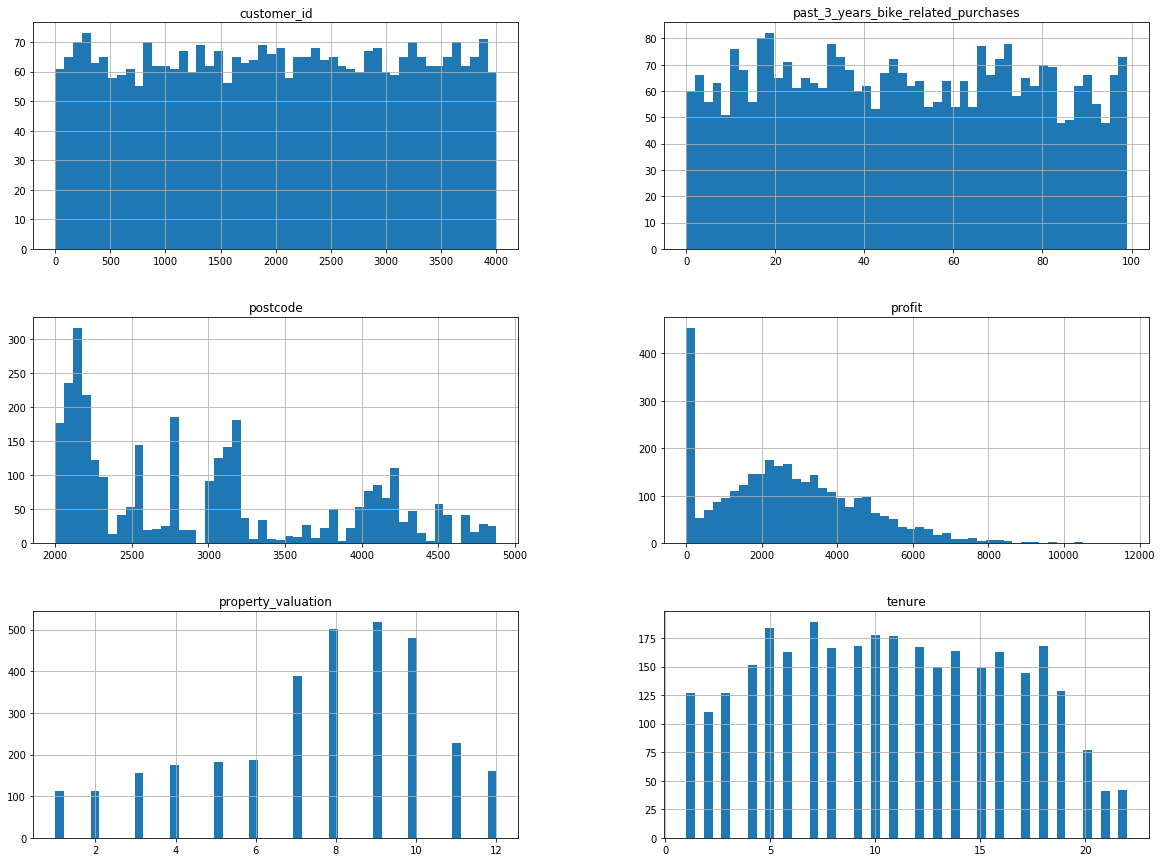

In [44]:
train_co.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


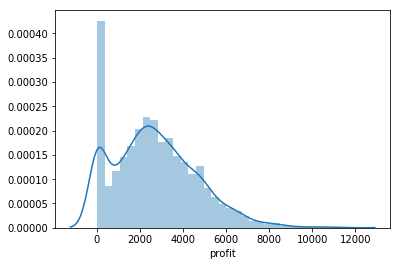

In [45]:
sns.distplot(train_co['profit'])

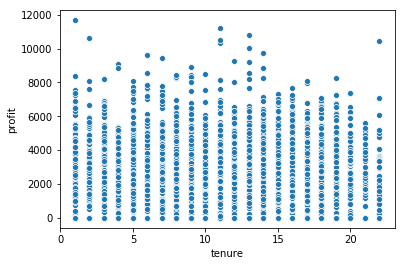

In [46]:
sns.scatterplot(x='tenure', y='profit', data=train_co)

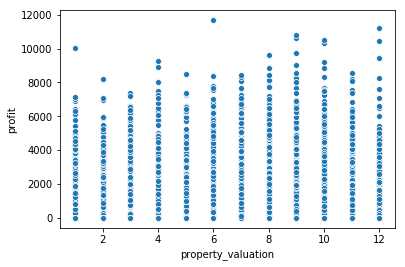

In [47]:
sns.scatterplot(x='property_valuation', y='profit', data=train_co)

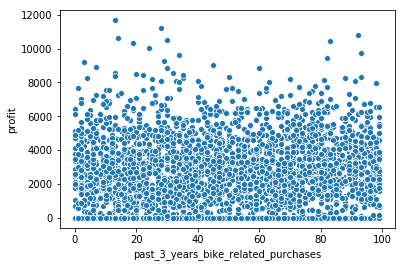

In [48]:
sns.scatterplot(x='past_3_years_bike_related_purchases', y='profit', data=train_co)

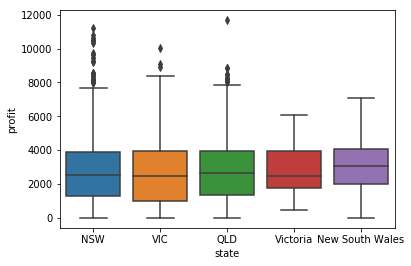

In [49]:
sns.boxplot(x='state', y='profit', data=train_co)

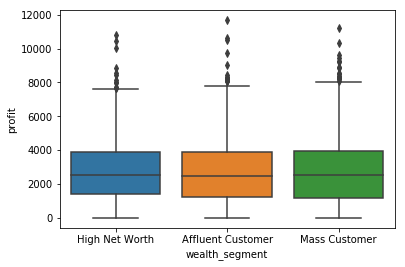

In [50]:
sns.boxplot(x='wealth_segment', y='profit', data=train_co)

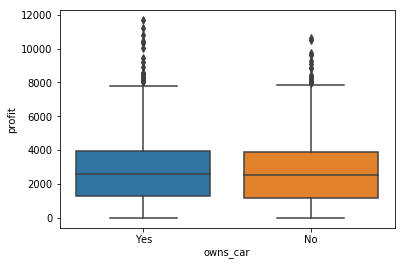

In [51]:
sns.boxplot(x='owns_car', y='profit', data=train_co)

### Data preprocessing

In [18]:
def create_age(data=None):
    """ To create age variable from DOB. """
    data['age'] = data['DOB'].map(lambda x: x.year)
    
    data['age'] = 2015 - data['age']
    
    return data

In [19]:
create_age(train_coX)
train_coX.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
1564,1565,Jay,Janiszewski,Male,71,1953-08-17,Sales Representative,Retail,High Net Worth,N,Yes,11.0,9 Eastlawn Court,2155,NSW,Australia,10,62.0
3234,3235,Leif,Woolfall,Male,88,1965-05-15,Business Systems Development Analyst,Property,Affluent Customer,N,Yes,12.0,9 Dixon Crossing,3793,VIC,Australia,7,50.0
2018,2019,Neda,Perkis,Female,48,1953-09-13,VP Marketing,Entertainment,High Net Worth,N,No,17.0,174 Calypso Crossing,2770,NSW,Australia,7,62.0
736,737,Sisely,Oppy,Female,75,1983-07-11,Systems Administrator III,NaN,Mass Customer,N,No,16.0,0297 Merchant Avenue,4121,QLD,Australia,9,32.0
2842,2843,Lorain,Danforth,Female,42,1968-04-20,Recruiter,Financial Services,Affluent Customer,N,Yes,5.0,48418 Crescent Oaks Court,2770,NSW,Australia,9,47.0


In [20]:
def correct_misspelled_gender(data=None):
    """ To correct misspelled gender values"""
    data['gender'].replace({'U' : 'Female', '247' : 'Female',
                              'F' : 'Female', 'Femal' : 'Female', 'M' : 'Male'}, inplace=True)
    return data

In [21]:
# correct misspelled gender values
correct_misspelled_gender(data=train_coX)
train_coX['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
def correct_misspelled_state(data=None):
    """ To correct misspelled state values"""
    data['state'].replace({'Victoria' : 'VIC', 'New South Wales' : 'NSW'}, inplace=True)
    
    return data

In [23]:
correct_misspelled_state(train_coX)
train_coX.state.unique()

array(['NSW', 'VIC', 'QLD'], dtype=object)

In [24]:
def discretize_categories(data=None):
    """ Converts all categorical variables' values to discrete numbers"""
    # gender variable
    data['gender'].replace({'Female' : 1, 'Male' : 2}, inplace=True)
    # job industry variable
    data['job_industry_category'].replace({'Entertainment' : 1, 'Telecommunications' : 2,
                                           'IT' : 3, 'Manufacturing' : 4, 'Financial Services' : 5,
                                           'Retail' : 6, 'Health' : 7, 'Property' : 8, 'Argiculture' : 9}, inplace=True)
    
    # state variable
    data['state'].replace({'NSW' : 1, 'VIC' : 2, 'QLD' : 3}, inplace=True)
    
    # wealth segment variable
    data['wealth_segment'].replace({'Affluent Customer' : 1, 'Mass Customer' : 2, 'High Net Worth' : 3}, inplace=True)
    
    # owns a car variable
    data['owns_car'].replace({'Yes' : 1, 'No' : 2}, inplace=True)
    
    return data

In [25]:
discretize_categories(data=train_coX)
train_coX.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
1564,1565,Jay,Janiszewski,2,71,1953-08-17,Sales Representative,6.0,3,N,1,11.0,9 Eastlawn Court,2155,1,Australia,10,62.0
3234,3235,Leif,Woolfall,2,88,1965-05-15,Business Systems Development Analyst,8.0,1,N,1,12.0,9 Dixon Crossing,3793,2,Australia,7,50.0
2018,2019,Neda,Perkis,1,48,1953-09-13,VP Marketing,1.0,3,N,2,17.0,174 Calypso Crossing,2770,1,Australia,7,62.0
736,737,Sisely,Oppy,1,75,1983-07-11,Systems Administrator III,NaN,2,N,2,16.0,0297 Merchant Avenue,4121,3,Australia,9,32.0
2842,2843,Lorain,Danforth,1,42,1968-04-20,Recruiter,5.0,1,N,1,5.0,48418 Crescent Oaks Court,2770,1,Australia,9,47.0


In [26]:
def drop_irrelevant_variables(data=None):
    """ To drop irrelevant variables"""
    data.drop(['customer_id', 'first_name', 'last_name',
               'DOB','job_title', 'deceased_indicator', 'address', 'postcode', 'country'],
              axis=1, inplace=True)
    
    return data

In [27]:
drop_irrelevant_variables(data=train_coX)
train_coX.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,age
1564,2,71,6.0,3,1,11.0,1,10,62.0
3234,2,88,8.0,1,1,12.0,2,7,50.0
2018,1,48,1.0,3,2,17.0,1,7,62.0
736,1,75,NaN,2,2,16.0,3,9,32.0
2842,1,42,5.0,1,1,5.0,1,9,47.0


### Data Transformation

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [28]:
# transforms numerical variables and categorical variables separately and then concatenate them
def pipeline_transformer(num_features, cat_features):
    """ - To transform numerical variables and categorical variables separately and then concatenate them.
    - You will first create 2 separate lists of variable names for the numerical variables and categorical variables.
    - num_features = list of numerical variable names
    - cat_features = list of categorical variable names
    """
    num_pipe = Pipeline([('Imputer', SimpleImputer(strategy='mean')), ('Scaler', StandardScaler())])
    cat_pipe = Pipeline([('Imputer', SimpleImputer(strategy='most_frequent')), ('Encoder', OneHotEncoder())])
    
    full_pipe = ColumnTransformer([('nums', num_pipe, num_features), ('cats', cat_pipe, cat_features)])
    
    return full_pipe

### First transformation and spot-checking trial

In [29]:
num_feats = ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'age']
cat_feats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']

In [30]:
pipeliner = pipeline_transformer(num_feats, cat_feats)
train_cop_preprocessed = pipeliner.fit_transform(train_coX)
train_cop_preprocessed

array([[ 0.7704456 ,  0.05820949,  0.86977896, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.36298713,  0.23829691, -0.1945777 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.03122825,  1.13873401, -0.1945777 , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.71154098,  1.13873401, -1.25893436, ...,  0.        ,
         1.        ,  0.        ],
       [-0.48434824, -0.30196534, -1.61371992, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1357944 , -1.38248986, -1.96850547, ...,  0.        ,
         0.        ,  1.        ]])

In [26]:
# import relevant libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [52]:
# define the pipeline
models = []

models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SGD', SGDRegressor()))
models.append(('Ridge', Ridge()))

# empty lists to store model names and results
results = []
names = []

# Kfold and cross validation parameters
seed = 234
num_fold = 5
scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results = cross_val_score(model, train_cop_preprocessed, train_coY, cv=kfold, scoring=scoring, n_jobs=-1)
    
    # output to evaluate results
    rmse = np.sqrt(-cv_results)
    
    # append each model results into empty lists created
    results.append(rmse)
    names.append(name)
    
    see_results = '%s: %f (%f)' % (name, rmse.mean(), rmse.std())
    print(see_results)

C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 1954.178111 (62.080975)
Lasso: 1953.266064 (61.897055)
EN: 1948.529228 (60.037004)
KNN: 2143.406978 (50.516617)
SVR: 1954.339798 (55.503893)
CART: 2869.497754 (89.582624)
SGD: 1953.985268 (62.148225)
Ridge: 1954.140084 (62.076508)


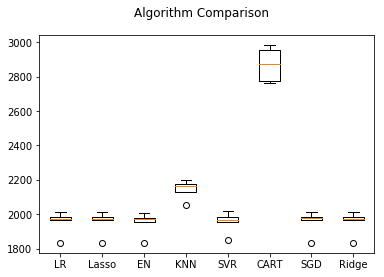

In [53]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Second transformation and spot-checking trial
I want to re-take spot checking. This time, tenure and property_valuation variables will be made discrete variables.

In [32]:
num_feats1 = ['past_3_years_bike_related_purchases', 'age']
cat_feats1 = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'tenure', 'property_valuation']

pipeliner1 = pipeline_transformer(num_feats1, cat_feats1)
train_cop_transformed1 = pipeliner1.fit_transform(train_coX)
train_cop_transformed1

<3200x55 sparse matrix of type '<class 'numpy.float64'>'
	with 28800 stored elements in Compressed Sparse Row format>

In [54]:
# define the pipeline
models1 = []

models1.append(('LR', LinearRegression()))
models1.append(('Lasso', Lasso()))
models1.append(('EN', ElasticNet()))
models1.append(('KNN', KNeighborsRegressor()))
models1.append(('SVR', SVR()))
models1.append(('CART', DecisionTreeRegressor()))
models1.append(('SGD', SGDRegressor()))
models1.append(('Ridge', Ridge()))

# empty lists to store model names and results
results1 = []
names1 = []

# Kfold and cross validation parameters
seed = 234
num_fold = 5
scoring = 'neg_mean_squared_error'

for name1, model1 in models1:
    kfold = KFold(n_splits=num_fold, random_state=seed)
    cv_results1 = cross_val_score(model1, train_cop_transformed1, train_coY, cv=kfold, scoring=scoring, n_jobs=-1)
    
    # output to evaluate results
    rmse1 = np.sqrt(-cv_results1)
    
    # append each model results into empty lists created
    results1.append(rmse1)
    names1.append(name1)
    
    see_results1 = '%s: %f (%f)' % (name1, rmse1.mean(), rmse1.std())
    print(see_results1)

LR: 1958.806523 (64.778517)
Lasso: 1956.149316 (64.266577)
EN: 1947.655433 (60.176483)
KNN: 2136.520869 (87.923823)
SVR: 1954.310379 (55.499330)
CART: 2830.527150 (83.270402)
SGD: 1957.561919 (65.243750)
Ridge: 1958.599190 (64.748896)


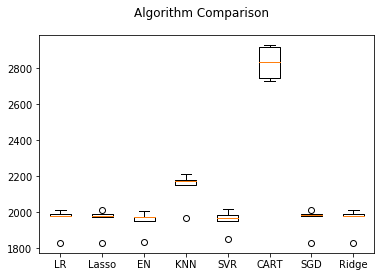

In [55]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

### Result Analysis
1. In both trials, all linear models are around a close range. The problems seems to be one that linear models might be best fit for.
2. ElasticNet has the lowest RMSE value. Shows to be the best model to try and look into
3. ElasticNet got better result in the second trial. So we leave tenure and property_valuation to be in discrete form.

### To try and run a default ElasticNet to predict some part of the test set

In [36]:
# create test copy
test_cop = test.copy()
test_cop.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
2196,2197,Filip,Willows,Male,32,1993-09-16,Programmer Analyst I,Financial Services,Mass Customer,N,No,7.0,11 Sage Place,4055,QLD,Australia,7,378.15
505,506,Brett,Scrancher,Female,43,1985-02-14,Health Coach II,Retail,Mass Customer,N,No,21.0,20373 Kensington Pass,2151,NSW,Australia,8,6985.24
3676,3677,Bartel,Fonteyne,Male,3,1986-07-11,Senior Financial Analyst,Financial Services,Mass Customer,N,Yes,20.0,8 Grover Parkway,2089,NSW,Australia,10,0.00
3066,3067,Veronique,Wash,Female,8,1991-01-13,Chief Design Engineer,Manufacturing,Mass Customer,N,Yes,9.0,23384 Kings Drive,2261,NSW,Australia,9,3575.90
2147,2148,Annis,Freeth,Female,78,1989-03-20,Engineer I,Manufacturing,Mass Customer,N,Yes,15.0,2800 Dottie Trail,3071,VIC,Australia,10,2346.16


In [37]:
# slice out first 100 rows of the set
some_testset = test_cop.iloc[0:100, ]
some_testset.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit
2196,2197,Filip,Willows,Male,32,1993-09-16,Programmer Analyst I,Financial Services,Mass Customer,N,No,7.0,11 Sage Place,4055,QLD,Australia,7,378.15
505,506,Brett,Scrancher,Female,43,1985-02-14,Health Coach II,Retail,Mass Customer,N,No,21.0,20373 Kensington Pass,2151,NSW,Australia,8,6985.24
3676,3677,Bartel,Fonteyne,Male,3,1986-07-11,Senior Financial Analyst,Financial Services,Mass Customer,N,Yes,20.0,8 Grover Parkway,2089,NSW,Australia,10,0.00
3066,3067,Veronique,Wash,Female,8,1991-01-13,Chief Design Engineer,Manufacturing,Mass Customer,N,Yes,9.0,23384 Kings Drive,2261,NSW,Australia,9,3575.90
2147,2148,Annis,Freeth,Female,78,1989-03-20,Engineer I,Manufacturing,Mass Customer,N,Yes,15.0,2800 Dottie Trail,3071,VIC,Australia,10,2346.16


In [35]:
# perform preprocessing and data transformation
some_testset_x, some_testset_y = x_y_data_split(some_testset)

create_age(some_testset_x)

correct_misspelled_gender(some_testset_x)

correct_misspelled_state(some_testset_x)

discretize_categories(some_testset_x)

drop_irrelevant_variables(some_testset_x)

some_testset_trans = pipeliner1.transform(some_testset_x)
some_testset_trans

<100x55 sparse matrix of type '<class 'numpy.float64'>'
	with 900 stored elements in Compressed Sparse Row format>

In [36]:
# train and predict
elastic_model = ElasticNet()
elastic_model.fit(train_cop_transformed1, train_coY)
some_elastic_predictions = elastic_model.predict(some_testset_trans)

In [37]:
#some_test_copY

elastic_mse = mean_squared_error(some_testset_y, some_elastic_predictions)
elastic_rmse = np.sqrt(elastic_mse)

print('mse:', elastic_mse, 'rmse:', elastic_rmse)

mse: 4166052.242160054 rmse: 2041.0909441178885


In [38]:
some_elastic_predictions

array([2787.11022056, 2629.99538935, 2771.21298068, 2672.34150547,
       2721.24297574, 2695.53850927, 2681.45319076, 2701.68313962,
       2773.66353681, 2737.3927954 , 2664.5131392 , 2697.28111967,
       2652.89829599, 2779.21019867, 2729.87886783, 2625.84448236,
       2599.91685263, 2736.85299948, 2687.66133159, 2818.23493854,
       2729.04261836, 2765.85769012, 2751.01701851, 2722.25197359,
       2784.3357936 , 2703.32720895, 2602.15581344, 2662.74201828,
       2704.89362199, 2670.99459769, 2667.18801024, 2748.98108801,
       2739.70632134, 2675.52134548, 2755.77355983, 2738.4027335 ,
       2733.64919914, 2770.76703212, 2722.50054412, 2783.37060969,
       2714.10084237, 2744.86475217, 2640.66182346, 2714.47151278,
       2708.51920186, 2749.37123487, 2715.74616154, 2759.87945169,
       2793.32840459, 2748.7110704 , 2665.29204078, 2713.60641069,
       2664.29637685, 2744.5961899 , 2632.1726961 , 2738.0264173 ,
       2738.91724946, 2769.48073583, 2818.1700335 , 2642.14112

In [39]:
some_testset_y

2196     378.15
505     6985.24
3676       0.00
3066    3575.90
2147    2346.16
2712     942.69
1334    3332.65
1188    1472.66
106     2343.97
2832    2638.92
2520    2105.39
1112    6072.48
2390    4852.43
2010     560.48
2685    6119.73
3417    2033.01
2773    1542.68
1465     978.42
3047    8379.96
2430     167.63
3493    2755.11
543     2246.42
2275    2304.77
1591    3348.25
1731    2263.39
881     4571.93
2253    2318.89
3311    3123.03
3345    1511.57
1354    2713.72
         ...   
1909     907.45
722     3489.96
173     7628.24
1370    1270.94
170     4833.14
3793       0.00
3396     808.85
1769    4366.04
3431    3707.70
883     2770.85
319     7204.66
385     2415.97
2867    2129.53
976     2449.15
326     3498.63
3924       0.00
1349    1235.26
1759    3666.94
1801    5035.80
460     5722.38
2557    2907.42
614     3620.88
1631     853.16
1213    3652.09
1168    4318.20
2505    3636.97
2961     444.65
91      2967.44
1526    3855.93
1237    1110.02
Name: profit, Length: 10

### Result Analysis
ElasticNet performance shows to be poor and underfitting the training data. This is apparent in the result on some of the test data. 

### Apply polynomial features and check ElasticNet performance on it with cross validation k=10

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [69]:
# Train Polynomial model of degree 2 on the train set
# Train features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly_features.fit_transform(train_cop_transformed1)

# Kfold and cross validation parameters
seed = 234
num_fold = 5
scoring = 'neg_mean_squared_error'

elastic_model1 = ElasticNet()
kfold = KFold(n_splits=num_fold, random_state=seed)
en_cv_results = cross_val_score(elastic_model1, x_poly_train, train_coY, cv=kfold, scoring=scoring, n_jobs=-1)

 # output to evaluate results
rmse1 = np.sqrt(-en_cv_results)
    
# print rmses
print('All RMSEs:', rmse1)
print('Mean RMSE:', np.mean(rmse1))

All RMSEs: [1962.80769876 1833.09553871 1977.36599879 2013.61188581 1982.59379834]
Mean RMSE: 1953.8949840821629


In [58]:
# Train Polynomial model of degree 3 on the train set
# Train features
poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train = poly_features.fit_transform(train_cop_transformed1)

# Kfold and cross validation parameters
seed = 234
num_fold = 5
scoring = 'neg_mean_squared_error'

elastic_model1 = ElasticNet()
kfold = KFold(n_splits=num_fold, random_state=seed)
en_cv_results = cross_val_score(elastic_model1, x_poly_train, train_coY, cv=kfold, scoring=scoring, n_jobs=-1)

 # output to evaluate results
rmse1 = np.sqrt(-en_cv_results)
    
# print rmses
print('All RMSEs:', rmse1)
print('Mean RMSE:', np.mean(rmse1))

All RMSEs: [1988.16805377 1847.92073918 1997.34989221 2101.83402461 2006.05395904]
Mean RMSE: 1988.2653337608685


In [60]:
# Train Polynomial model of degree 4 on the train set
# Train features
poly_features = PolynomialFeatures(degree=4, include_bias=False)
x_poly_train = poly_features.fit_transform(train_cop_transformed1)

# Kfold and cross validation parameters
seed = 234
num_fold = 5
scoring = 'neg_mean_squared_error'

elastic_model1 = ElasticNet()
kfold = KFold(n_splits=num_fold, random_state=seed)
en_cv_results = cross_val_score(elastic_model1, x_poly_train, train_coY, cv=kfold, scoring=scoring, n_jobs=-1)

 # output to evaluate results
rmse1 = np.sqrt(-en_cv_results)
    
# print rmses
print('All RMSEs:', rmse1)
print('Mean RMSE:', np.mean(rmse1))

All RMSEs: [ 2033.68690001  1886.99224359  2059.19608851 14182.65886408
  2065.08519448]
Mean RMSE: 4445.523858134466


### Result Analysis
1. ElasticNet on the plain data still gives a better RMSE.

### Hyperparameter tuning on ElasticNet

In [71]:
from sklearn.model_selection import GridSearchCV

In [75]:
elastic_model = ElasticNet()


param_g = {'alpha' : [1.0, 10.0, 100.0], 'l1_ratio' : [0.5, 0.6, 0.7, 0.8], 'max_iter' : [2000]}

seed = 234
num_fold = 5
scoring = 'neg_mean_squared_error'

kfold = KFold(n_splits=num_fold)

grid_search = GridSearchCV(estimator=elastic_model, param_grid=param_g, scoring=scoring, cv=kfold)

grid_result = grid_search.fit(train_cop_transformed1, train_coY)

print("Best RMSE: %f using %s" % (np.sqrt(-grid_result.best_score_), grid_result.best_params_))
means = np.sqrt(-grid_result.cv_results_['mean_test_score'])
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f with: %r" % (mean, param))

Best RMSE: 1948.539267 using {'alpha': 10.0, 'l1_ratio': 0.7, 'max_iter': 2000}
1948.584844 with: {'alpha': 1.0, 'l1_ratio': 0.5, 'max_iter': 2000}
1948.669308 with: {'alpha': 1.0, 'l1_ratio': 0.6, 'max_iter': 2000}
1948.809465 with: {'alpha': 1.0, 'l1_ratio': 0.7, 'max_iter': 2000}
1949.068828 with: {'alpha': 1.0, 'l1_ratio': 0.8, 'max_iter': 2000}
1948.544700 with: {'alpha': 10.0, 'l1_ratio': 0.5, 'max_iter': 2000}
1948.541540 with: {'alpha': 10.0, 'l1_ratio': 0.6, 'max_iter': 2000}
1948.539267 with: {'alpha': 10.0, 'l1_ratio': 0.7, 'max_iter': 2000}
1948.545176 with: {'alpha': 10.0, 'l1_ratio': 0.8, 'max_iter': 2000}
1948.623814 with: {'alpha': 100.0, 'l1_ratio': 0.5, 'max_iter': 2000}
1948.623814 with: {'alpha': 100.0, 'l1_ratio': 0.6, 'max_iter': 2000}
1948.623814 with: {'alpha': 100.0, 'l1_ratio': 0.7, 'max_iter': 2000}
1948.623814 with: {'alpha': 100.0, 'l1_ratio': 0.8, 'max_iter': 2000}


In [78]:
some_predictions = grid_result.best_estimator_.predict(some_testset_trans)

#some_testset_y

some_elastic_mse = mean_squared_error(some_testset_y, some_predictions)
some_elastic_rmse = np.sqrt(some_elastic_mse)

print('mse:', some_elastic_mse, 'rmse:', some_elastic_rmse)

mse: 4148071.8843988758 rmse: 2036.6815864044324


In [79]:
some_predictions

array([2711.65799284, 2689.42168763, 2711.0651823 , 2695.44854065,
       2707.16219737, 2709.27005043, 2701.14937887, 2707.35054733,
       2719.51179216, 2713.4905847 , 2698.49823735, 2703.50879423,
       2697.67276725, 2720.00771442, 2710.93575838, 2684.49639281,
       2688.60760658, 2710.56038317, 2700.97599579, 2718.60145844,
       2708.90695984, 2717.47877365, 2711.96107609, 2709.3898946 ,
       2724.44692932, 2703.72499358, 2684.98677229, 2692.96575118,
       2701.25597384, 2698.80694132, 2699.45704297, 2712.58602423,
       2708.51289875, 2695.97794405, 2718.38202853, 2711.08293377,
       2717.0530917 , 2712.62055889, 2716.47640744, 2712.50372563,
       2708.06633521, 2710.69423185, 2693.22263819, 2702.25095745,
       2704.09065352, 2715.13027263, 2702.94709709, 2718.60211615,
       2721.61807331, 2714.68769697, 2694.802147  , 2702.1536292 ,
       2695.1425281 , 2714.34843187, 2691.56380664, 2710.92150116,
       2711.22871329, 2712.31290392, 2726.72728516, 2697.45385

### Result Analysis
1. These hyperparameter values performed better than the default values on the testset.

### Train this model on the full trainset and evaluate on the full test

In [41]:
# call functions specifically created
from spc_dataprep import x_y_data_split as split
import complete_transformer as ct

In [42]:
# split train set to X and y
train_x, train_y = split(train)
train_x.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
1564,1565,Jay,Janiszewski,Male,71,1953-08-17,Sales Representative,Retail,High Net Worth,N,Yes,11.0,9 Eastlawn Court,2155,NSW,Australia,10
3234,3235,Leif,Woolfall,Male,88,1965-05-15,Business Systems Development Analyst,Property,Affluent Customer,N,Yes,12.0,9 Dixon Crossing,3793,VIC,Australia,7
2018,2019,Neda,Perkis,Female,48,1953-09-13,VP Marketing,Entertainment,High Net Worth,N,No,17.0,174 Calypso Crossing,2770,NSW,Australia,7
736,737,Sisely,Oppy,Female,75,1983-07-11,Systems Administrator III,NaN,Mass Customer,N,No,16.0,0297 Merchant Avenue,4121,QLD,Australia,9
2842,2843,Lorain,Danforth,Female,42,1968-04-20,Recruiter,Financial Services,Affluent Customer,N,Yes,5.0,48418 Crescent Oaks Court,2770,NSW,Australia,9


In [43]:
data_attributes = list(train_x)

In [47]:
data_tidying = ct.TidyData(data_attributes)
train_x_processed = data_tidying.fit_transform(train_x)
train_x_processed.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
1564,2,71,62.0,6.0,3,1,11.0,1,10
3234,2,88,50.0,8.0,1,1,12.0,2,7
2018,1,48,62.0,1.0,3,2,17.0,1,7
736,1,75,32.0,NaN,2,2,16.0,3,9
2842,1,42,47.0,5.0,1,1,5.0,1,9


In [44]:
num_feats = ['past_3_years_bike_related_purchases', 'DOB']
cat_feats = ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state', 'tenure', 'property_valuation']

In [48]:
data_transformer = ct.pipeline_transformer(num_feats, cat_feats)
train_x_transformed = data_transformer.fit_transform(train_x_processed)
train_x_transformed

<3200x55 sparse matrix of type '<class 'numpy.float64'>'
	with 28800 stored elements in Compressed Sparse Row format>

In [49]:
model = ElasticNet(alpha=10.0, l1_ratio=0.7, max_iter=2000)

model.fit(train_x_transformed, train_y)

ElasticNet(alpha=10.0, l1_ratio=0.7, max_iter=2000)

##### Processing test set

In [55]:
test_x, test_y = split(test)

In [56]:
test_x_processed = data_tidying.transform(test_x)

In [57]:
test_transformed = data_transformer.transform(test_x_processed)

In [58]:
test_predictions = model.predict(test_transformed)

rmse = np.sqrt(mean_squared_error(test_y, test_predictions))
print('RMSE:', rmse)

RMSE: 1931.0608387794186


### Save Model along with transformers with Joblib

In [59]:
import joblib as jb

In [60]:
jb.dump([data_tidying, data_transformer, model], 'sprocket_model.sav', compress=1)

['sprocket_model.sav']

## DONE